In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Baca data salary
data = pd.read_csv('SalaryData.csv')

# Exploratory Data Analysis

In [3]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


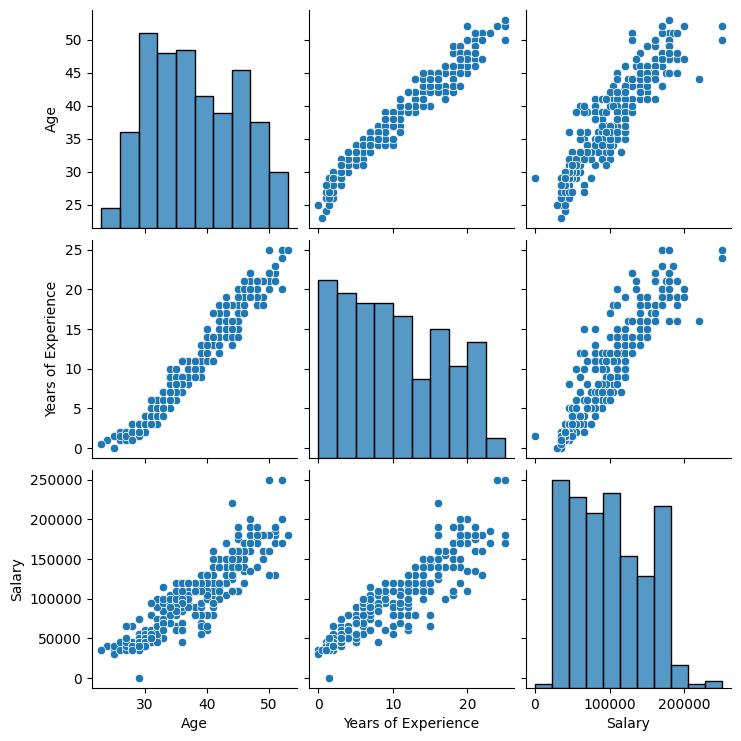

In [5]:
sns.pairplot(data)

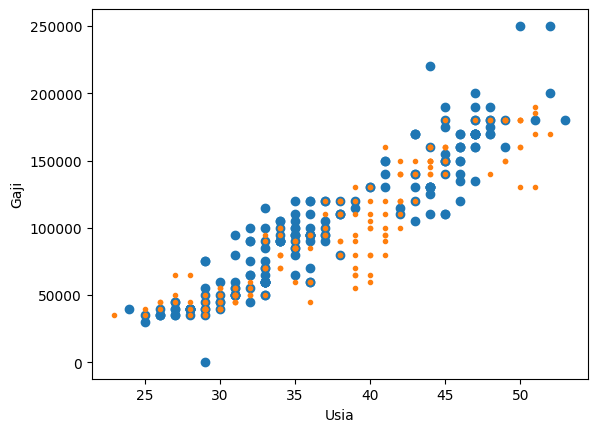

In [21]:
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']
plt.scatter(male_data['Age'], male_data['Salary'])
plt.scatter(female_data['Age'], female_data['Salary'], s=9)
plt.xlabel('Usia' )
plt.ylabel('Gaji')
plt.show()

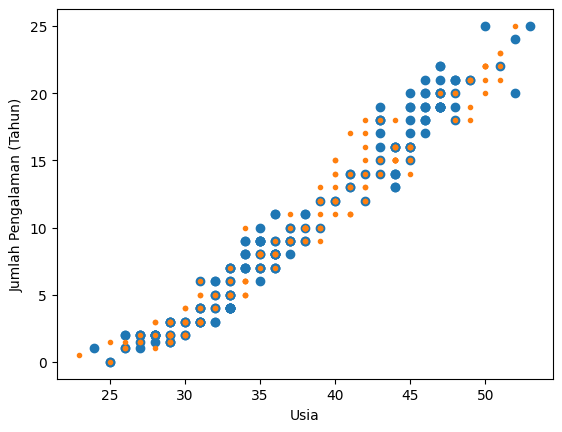

In [20]:
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']
plt.scatter(male_data['Age'], male_data['Years of Experience'])
plt.scatter(female_data['Age'], female_data['Years of Experience'], s=9)
plt.xlabel('Usia' )
plt.ylabel('Jumlah Pengalaman (Tahun)')
plt.show()

# Preproses

In [6]:
# buang data yang kosong
data.dropna(inplace=True)

# Modelling ML (Linear Reggression)

In [7]:
X = data[['Age', 'Years of Experience']]
y = data['Salary']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3872)

In [9]:
model_regresi = LinearRegression()
model_regresi.fit(X_train, y_train)

LinearRegression()

## Tes Hasil Prediksi

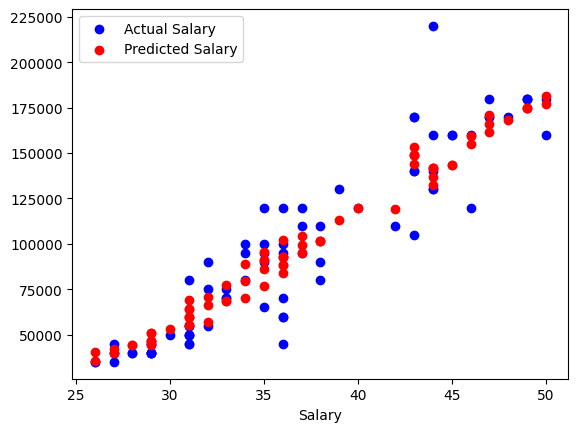

In [10]:
model_regresi_pred = model_regresi.predict(X_test)

plt.scatter(X_test.iloc[:, 0], y_test, label='Actual Salary', color='blue')
plt.scatter(X_test.iloc[:, 0], model_regresi_pred, label='Predicted Salary', color='red')
plt.xlabel('Age')
plt.xlabel('Salary')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, model_regresi_pred) / y_test.size
print(f'Mean Absolute Error (MAE): {mae:.2f}')

mse = mean_squared_error(y_test, model_regresi_pred) / y_test.size
print(f'Mean Squared Error (MSE): {mse:.2f}')

rmse = np.sqrt(mse) / y_test.size
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 154.73
Mean Squared Error (MSE): 3812100.38
Root Mean Squared Error (RMSE): 26.03


## Contoh hasil prediksi

In [11]:
# Contoh prediksi dengan umur 32 dan 5 tahun pengalaman kerja
X = np.array([[32, 5]])
gaji_X = model_regresi.predict(X)
print(f"Prediksi gajinya adalah {int(gaji_X[0])}")

Prediksi gajinya adalah 66329


/home/rico/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Simpan model

In [12]:
import pickle
filename = 'prediksi_gaji.sav'
pickle.dump(model_regresi, open(filename, 'wb'))